

# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

Introduction

 This data is from the kaggle website https://www.kaggle.com/joniarroba/noshowappointments/discussion 
 This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. 
 ● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
 ● ‘Neighborhood’ indicates the location of the hospital. 
 ● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 
 ● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. 
 A person makes a doctor appointment, receives all the instructions and no-show. Who to blame? 
 the questions are :-
 
 1 What is the percentage of patients who show up in the appointment?
 
 2 (Is The age a factor for not showing up at the appointment?
 
3 (Is Gender a factor for not showing up at the appointment?

4 (Is Alcoholism a factor for not showing up at the appointment?)

5 What is the disease that most patients suffer from
 
 
 

In [283]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns

In [284]:

#Read the data


df = pd.read_csv("appointmentnoshows.csv")

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [285]:


# showing the first 5 lines of the data!
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [286]:
#Summary for the data 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [287]:
#Summary for the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [288]:
#check for null values
pd.isnull(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [289]:
# correct Hipertension colum to hypertension 
df = df.rename(columns={"Hipertension":"Hypertension"})

In [290]:
# check if there is a dplicates in the data 
print("No_OF_Dublicated", + sum(df.duplicated()))

No_OF_Dublicated 0


In [291]:
# chek if is age <0 or = 0
df[df["Age"]<0]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [292]:
df.drop(index=99832, inplace=True)



In [293]:
df.shape


(110526, 14)

In [294]:
# Drop pationt ID we don't need it
df.drop(["PatientId"],axis = 1, inplace = True)

In [295]:
# Check if Scholarship 0r Hipertension or Diabetes or Alcoholism or Handcap or SMS_received not 1 or 0
#check if there is any value dosn't 0,1 in  Scholarship colum 
Scholarship = df["Scholarship"]
defect_Scholarship = 0
for i in Scholarship :
    if i!= 1 and i!= 0 :
        defect_Scholarship +=1
print(defect_Scholarship)

0


In [296]:
#check if there is any value dosn't 0,1 in  Hypertension colum 
Hipertension = df["Hypertension"]
defect_Hipertension = 0
for i in Hipertension :
    if i!= 1 and i!= 0 :
        defect_Hipertension +=1
print(defect_Hipertension)

0


In [297]:
#check if there is any value dosn't 0,1 in  Diabetes colum
Diabetes = df["Diabetes"]
defect_Diabetes = 0
for i in Diabetes :
    if i!= 1 and i!= 0 :
        defect_Diabetes +=1
print(defect_Diabetes)

0


In [298]:
#check if there is any value dosn't 0,1 in  Alcoholism colum
Alcoholism = df["Alcoholism"]
defect_Alcoholism = 0
for i in Alcoholism :
    if i!= 1 and i!= 0 :
        defect_Alcoholism +=1
print(defect_Alcoholism)

0


In [299]:
#check if there is any value dosn't 0,1 in  SMS_received column
SMS_received = df["SMS_received"]
defect_SMS_received = 0
for i in SMS_received :
    if i!= 1 and i!= 0 :
        defect_SMS_received +=1
print(defect_SMS_received)

0


In [300]:
# Check if any value in  No-show column  not (yes or no)
Noshow = df["No-show"]
defect_Noshow = 0
n="No"
y="Yes"
for i in Noshow :
    if i!= n and i!=y  :
        defect_Noshow +=1
print(defect_Noshow)


0


# Data Cleaning!

## convering ScheduledDay and AppointmentDay to Date&Time instead of String

In [301]:
#convering ScheduledDay   to Date&Time instead of String
df["ScheduledDay"]=pd.to_datetime(df["ScheduledDay"])

In [302]:
#convering  AppointmentDay to Date&Time instead of String
df["AppointmentDay"]=pd.to_datetime(df["AppointmentDay"])

In [303]:
# fixing the ages that are less then 0 by taking the mean of all ages and put those values into it


In [304]:
# check changes 
df[df["Age"]<=0]

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,5638545,F,2016-04-29 08:08:43+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,No
63,5628286,M,2016-04-27 10:46:12+00:00,2016-04-29 00:00:00+00:00,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,5616082,M,2016-04-25 13:28:21+00:00,2016-04-29 00:00:00+00:00,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,5628321,M,2016-04-27 10:48:50+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,No
67,5639264,F,2016-04-29 08:53:02+00:00,2016-04-29 00:00:00+00:00,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,5702537,F,2016-05-16 12:30:58+00:00,2016-06-01 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5777724,M,2016-06-06 14:22:34+00:00,2016-06-08 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,5772400,F,2016-06-03 15:18:44+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,5769545,F,2016-06-03 08:56:51+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [305]:
# checking changes 
df.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the percentage of patients who show up in the appointment?)

No     88207
Yes    22319
Name: No-show, dtype: int64

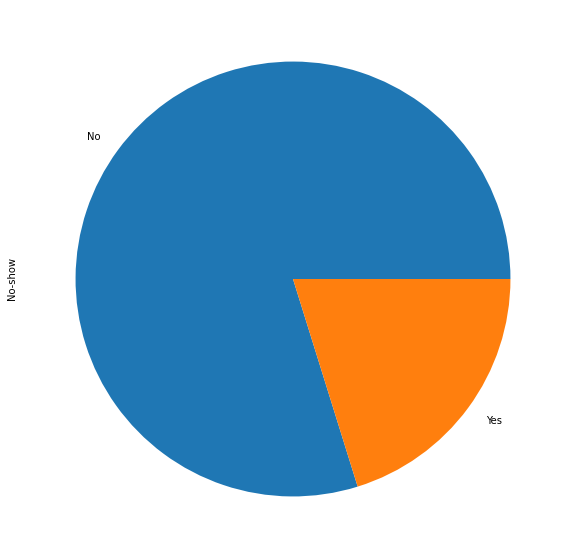

In [306]:
df["No-show"].value_counts().plot(kind="pie",figsize=(10,10))
df["No-show"].value_counts()

In [307]:
df_Noshow=df[df["No-show"]=="Yes"]
df_Noshow

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes
20,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110484,5772155,F,2016-06-03 14:43:56+00:00,2016-06-07 00:00:00+00:00,45,BARRO VERMELHO,0,0,0,0,0,0,Yes
110492,5786741,M,2016-06-08 08:50:19+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,0,1,0,0,0,0,Yes
110496,5779046,F,2016-06-06 17:35:38+00:00,2016-06-08 00:00:00+00:00,37,MARIA ORTIZ,0,1,0,0,0,0,Yes
110515,5778621,M,2016-06-06 15:58:05+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,0,1,0,0,0,0,Yes


In [308]:


df_show=df[df["No-show"]=="No"]
df_show


,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [309]:

print(df_Noshow["No-show"].count())
print(df_show["No-show"].count())
print(df_Noshow["No-show"].count()/df["No-show"].count())
print(df_show["No-show"].count()/df["No-show"].count())

22319
88207
0.20193438647919945
0.7980656135208005


## We Observed that 20% from patient don't show up in the Appointment & 80% from patient showing up in the Appointment

## Research Question 2 (Is The age a factor for not showing up at the appointment?)

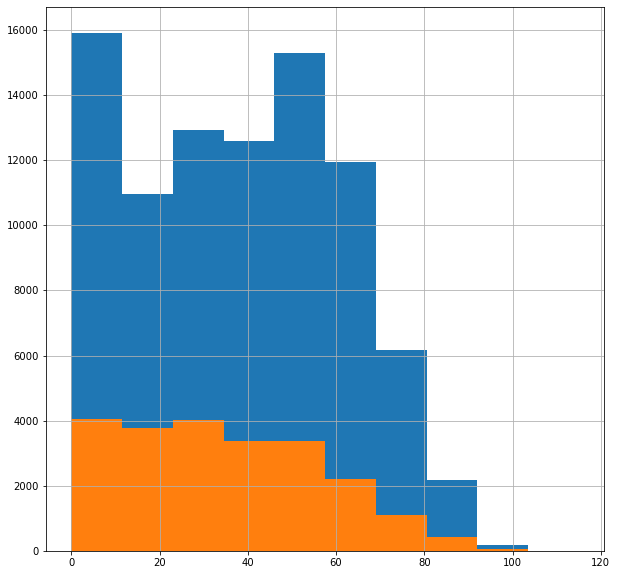

In [310]:
# Is The age a factor for not showing up at the appointment?
#Proportion of Male & Female Show up in appionment

df_show["Age"].hist(label=" patient who showing up", figsize=(10,10))
df_Noshow["Age"].hist(label=" patient who don't showing up")


In [311]:
print(df_show["Age"].mean())
print(df_Noshow["Age"].mean())

37.790504154999034
34.31766656212196


## There is no big difference in the average age of patients who miss an appointment and who show up on an appointment

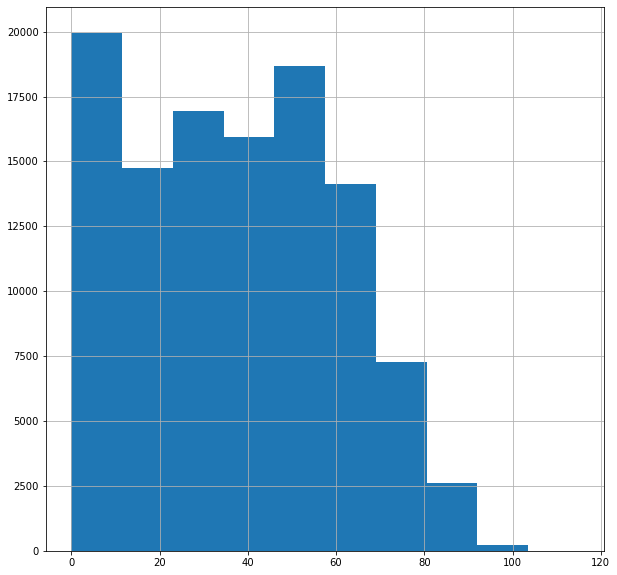

In [312]:
df["Age"].hist(figsize=(10,10))

## Research Question 3  (Is Gender a factor for not showing up at the appointment?)

In [313]:
df.groupby("No-show")["Gender"].value_counts(normalize=True)

No-show  Gender
No       F         0.648985
         M         0.351015
Yes      F         0.653882
         M         0.346118
Name: Gender, dtype: float64

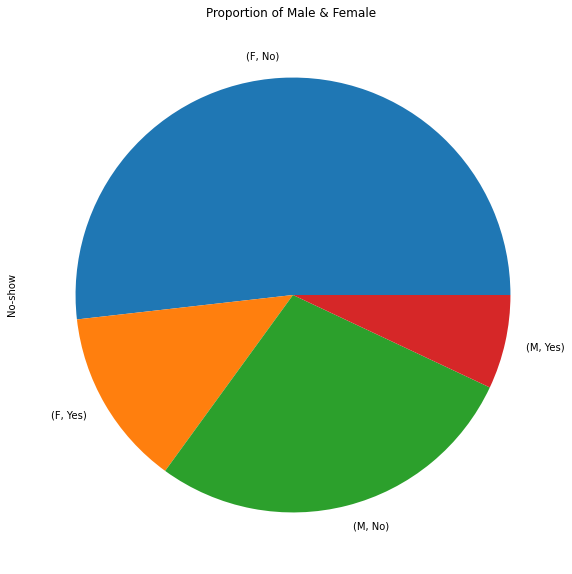

In [314]:
df.groupby('Gender')['No-show'].value_counts().plot(kind="pie",title="Proportion of Male & Female ",figsize=(10,10))

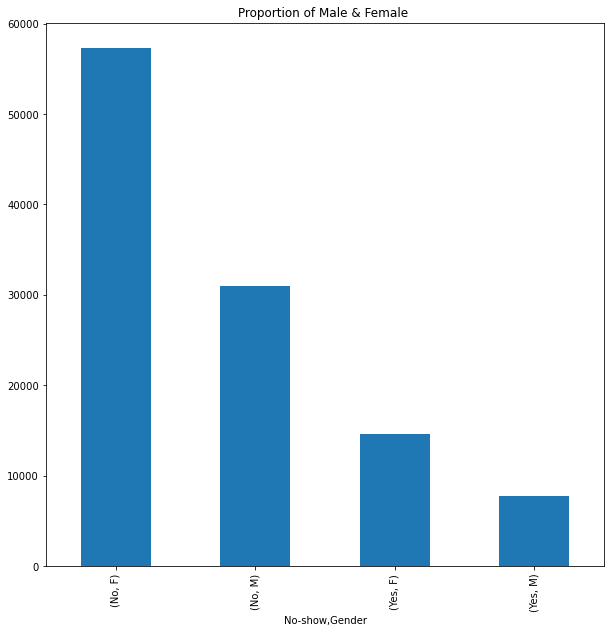

In [315]:
df.groupby('No-show')['Gender'].value_counts().plot(kind="bar",title="Proportion of Male & Female ",figsize=(10,10))

Gender  No-show
F       No         57245
M       No         30962
Name: No-show, dtype: int64

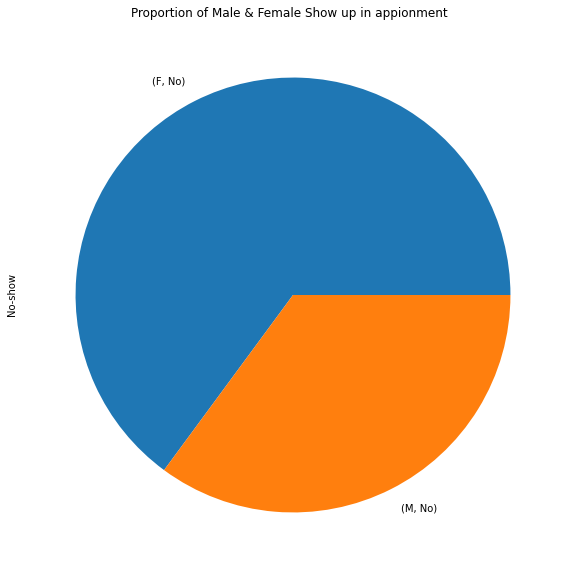

In [316]:
# Is Gender a factor for not showing up at the appointment?
#Proportion of Male & Female Show up in appionment

df_show.groupby("Gender")["No-show"].value_counts().plot(kind="pie",title="Proportion of Male & Female Show up in appionment  ",figsize=(10,10) )
df_show.groupby("Gender")["No-show"].value_counts()


Gender  No-show
F       Yes        14594
M       Yes         7725
Name: No-show, dtype: int64

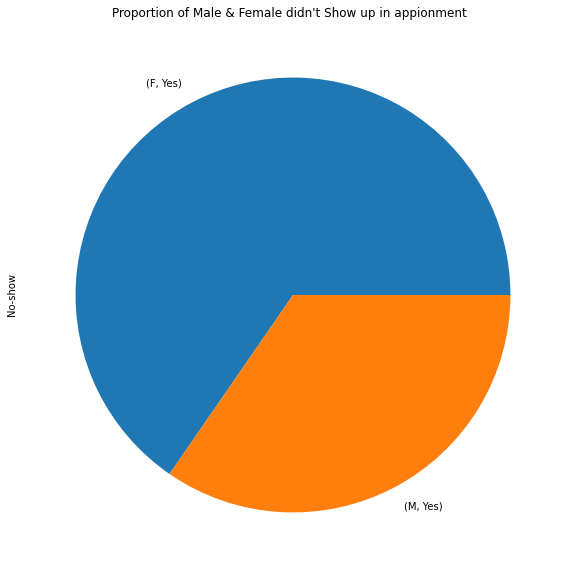

In [317]:
# Is sex a factor for not showing up at the appointment?
#Proportion of Male & Female did'nt Show up in appionment

df_Noshow.groupby("Gender")["No-show"].value_counts().plot(kind="pie",title="Proportion of Male & Female didn't Show up in appionment  ",figsize=(10,10) )
df_Noshow.groupby("Gender")["No-show"].value_counts()

### Note that there is not much difference between sick men and women who miss the appointment and those who show up on the appointment

## Research Question 3 (Is Alcoholism a factor for not showing up at the appointment?)


In [318]:
# Is Alcoholism a factor for not showing up at the appointment?
df.groupby("No-show")["Alcoholism"].value_counts(normalize=True)

No-show  Alcoholism
No       0             0.969583
         1             0.030417
Yes      0             0.969667
         1             0.030333
Name: Alcoholism, dtype: float64

### We notes that there is not much difference between patients have Alcoholism  who miss the appointment and those who show up on the appointment



Alcoholism  No-show
0           Yes        21642
1           Yes          677
Name: No-show, dtype: int64

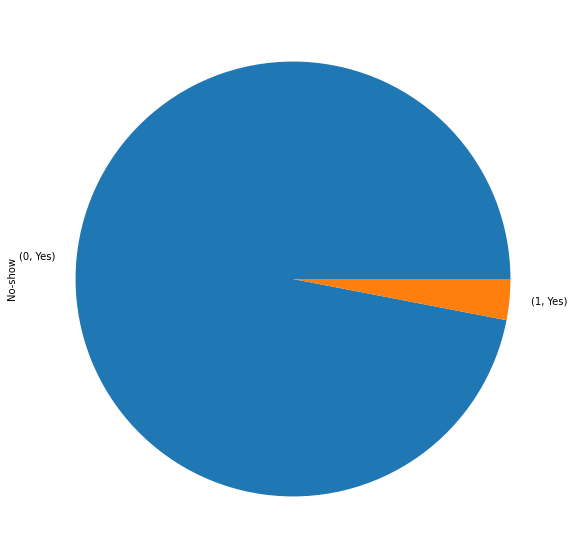

In [319]:
df_Noshow.groupby("Alcoholism")["No-show"].value_counts().plot(kind="pie",figsize=(10,10) )
df_Noshow.groupby("Alcoholism")["No-show"].value_counts()

Alcoholism  No-show
0           No         85524
1           No          2683
Name: No-show, dtype: int64

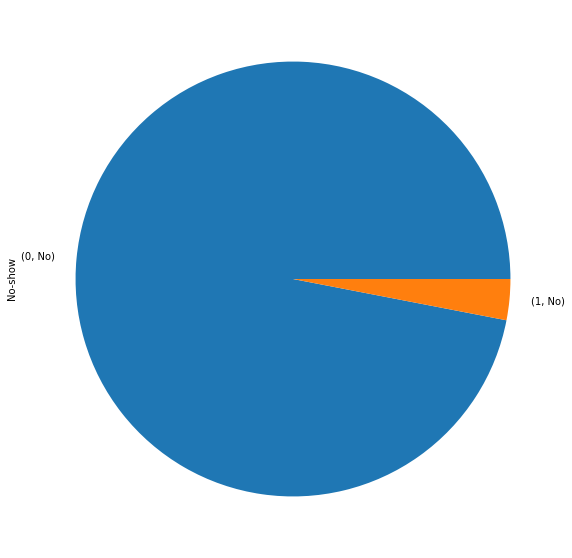

In [320]:
df_show.groupby("Alcoholism")["No-show"].value_counts().plot(kind="pie",figsize=(10,10) )
df_show.groupby("Alcoholism")["No-show"].value_counts()

Alcoholism  No-show
0           No         85524
1           No          2683
Name: No-show, dtype: int64

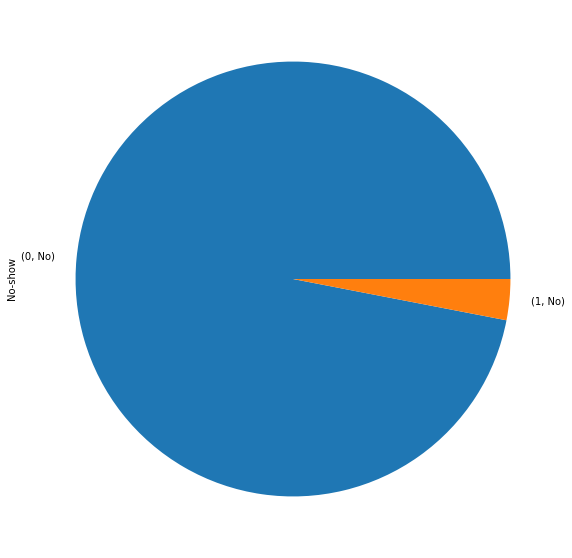

In [321]:
# Is Alcoholism a factor for not showing up at the appointment?


df_show.groupby("Alcoholism")["No-show"].value_counts().plot(kind="pie",figsize=(10,10) )
df_show.groupby("Alcoholism")["No-show"].value_counts()

## Research Question  5 What is the disease that most patients suffer from

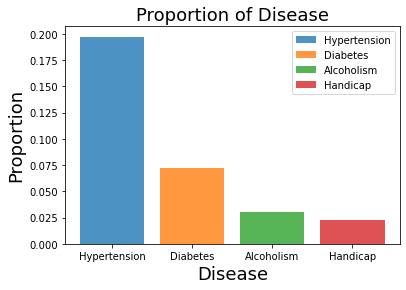

In [322]:
plt.bar(1,df['Hypertension'].mean(),alpha=0.8,label = 'Hypertension')
plt.bar(2,df['Diabetes'].mean(),alpha=0.8,label = 'Diabetes');
plt.bar(3,df['Alcoholism'].mean(),alpha=0.8,label = 'Alcoholism')
plt.bar(4,df['Handcap'].mean(),alpha=0.8,label = 'Handicap')
location = [1,2,3,4]
label = ['Hypertension','Diabetes','Alcoholism','Handicap']
location = [1,2,3,4]
#set ticklabels and title
plt.xticks(location,label)
plt.xlabel('Disease',fontsize = 18)
plt.ylabel('Proportion', fontsize = 18)
plt.title('Proportion of Disease',fontsize = 18)
plt.legend()
plt.figsize = (15,15)

### > ### We can observe Most of the people in our data set are suffering from Hypertension.

Hypertension  No-show
0             Yes        18547
1             Yes         3772
Name: No-show, dtype: int64

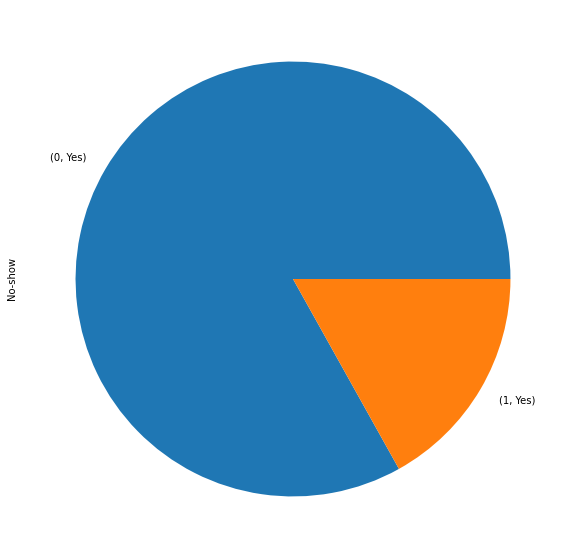

In [323]:
df_Noshow.groupby("Hypertension")["No-show"].value_counts().plot(kind="pie",figsize=(10,10) )
df_Noshow.groupby("Hypertension")["No-show"].value_counts()


Hypertension  No-show
0             No         70178
1             No         18029
Name: No-show, dtype: int64

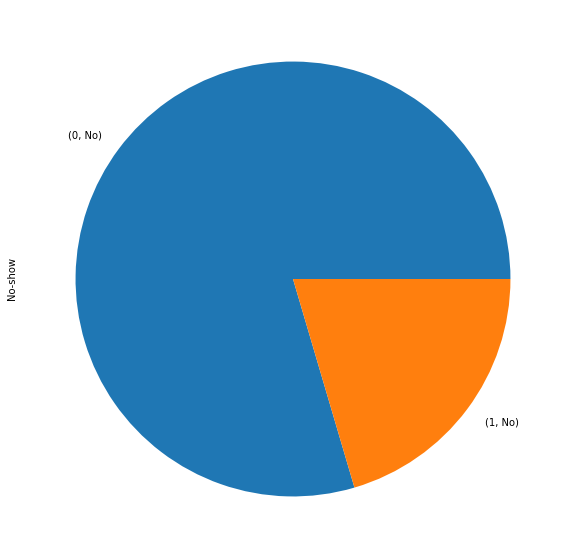

In [324]:
df_show.groupby("Hypertension")["No-show"].value_counts().plot(kind="pie",figsize=(10,10) )
df_show.groupby("Hypertension")["No-show"].value_counts()

In [325]:
df_heprNoShow=df[df["No-show"]=="Yes"]
df_heprNoShow["No-show"].count()

22319

In [326]:
df_heprShow=df[df["No-show"]=="No"]
df_heprShow["No-show"].count()


88207

### <a id='conclusions'></a>
## Conclusions:



1 We Observed that 20% from patient don't show up in the Appointment & 80% from patient showing up in the Appointment

2 There is no big difference in the average age of patients who miss an appointment and who show up on an appointment

3Note that there is not much difference between sick men and women who miss the appointment and those who show up on the appointment 

4 We notes that there is not much difference between patients have Alcoholism  who miss the appointment and those who show up on the appointment 

5 We can observe Most of the people in our data set are suffering from Hypertension.
